Group member: Mahmud Hasan Al Raji and Warner Alexis


This code uses the **Gutenberg corpus** from the **NLTK library**, which provides access to a collection of classic literary texts in plain text format. The command `gutenberg.fileids()` lists all the available books in the corpus, and by selecting `'austen-emma.txt'`, the code specifically loads the full text of **Jane Austen’s *Emma*** into the variable `doc_text`. The novel *Emma*, published in **1815**, is one of Austen’s most famous works and centers on **Emma Woodhouse**, a young woman who enjoys matchmaking but often misjudges the relationships and emotions of those around her. This dataset is commonly used in text analysis and natural language processing because it represents 19th-century English literature with rich vocabulary, distinct dialogue, and character interactions—making it ideal for studying word frequency, sentiment, and stylistic patterns.


In [8]:
import re
from collections import Counter
import math 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from textwrap import dedent


In [17]:
from nltk.corpus import gutenberg

# list available texts
print(gutenberg.fileids())

# pick a corpus, e.g. Jane Austen’s *Emma*
doc_text = gutenberg.raw('austen-emma.txt')

print(len(doc_text), "characters")
print(doc_text[:500])

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
887071 characters
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [18]:
corpus_text = dedent(doc_text).strip()

token_pattern = re.compile(r"[A-Za-z]+(?:'[A-Za-z]+)?")

def tokenize(text: str):
    return [t.lower() for t in token_pattern.findall(text)]

In [19]:
tokens = tokenize(doc_text)

In [20]:
# How many unique total words?
vocab = sorted(set(tokens))
num_unique = len(vocab)

#Fequency table 
counts = Counter(tokens)
total_tokens = len(tokens)


This section of the code performs the **text preprocessing** phase, which is essential before conducting any linguistic or frequency analysis on the *Emma* text. The process begins by defining a **tokenization pattern** using regular expressions to extract only alphabetic words (including words with apostrophes, like “don’t”). The `tokenize()` function converts all words to lowercase for consistency and then produces a list of tokens essentially the individual words that make up the text. Next, the code calculates the **vocabulary size** (`num_unique`) by finding all unique words and counts the **total number of tokens** using Python’s `Counter`.

After that, a **stopword removal** step is applied. Using NLTK’s built-in English stopwords (common words like “the,” “and,” “is”), along with a custom list of additional words specific to this text (such as “mr,” “mrs,” “could,” “would,” “said”), the code filters out words that carry little semantic meaning or are overly frequent in Austen’s narrative style. The resulting `tokens_no_stop` list contains cleaner, content-rich words better suited for analysis of meaningful vocabulary and stylistic patterns within *Emma*.


In [35]:
from  nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize

nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
custom_stopwords = {'mr', 'mrs', 'miss', 'ms', 'could', 'would', 'must', 'never', 'much', 'said', 'one','shall',
                    'us','two','still','yet','less'}
stop_words.update(custom_stopwords)

# Tokenize and remove stopwords
tokens_no_stop = [w for w in tokens if w not in stop_words]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Warner_Beast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Pos tagg for filtering tokens 
tagged = pos_tag(tokens_no_stop)
#Keep only words tokens 
content_tags = {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS'}
content_words = [word for word, tag in tagged if tag in content_tags]


We create these steps to  focus on refining the text by keeping only **content words** those that carry real meaning, such as nouns, verbs, adjectives, and adverbs—while filtering out **stopwords** and less informative tokens. Stopwords like *the*, *is*, *and*, or *to* are extremely common in English but add little analytical value because they don’t reflect the subject matter or style of a text. Similarly, the code removes words like *mr*, *mrs*, and *said*, which appear frequently in literary works like *Emma* but don’t contribute much to understanding the story’s themes or emotions.

After tokenizing and cleaning the text, the script uses **part-of-speech (POS) tagging** (`pos_tag`) to identify the grammatical role of each word. It then filters tokens to include only those tagged as nouns, verbs, adjectives, or adverbs defined in the `content_tags` set. This ensures the analysis focuses on meaningful vocabulary that conveys actions, descriptions, and ideas rather than grammatical connectors or repetitive names. Finally, it recalculates the frequency of these filtered words to identify the **most significant 200 content words**, allowing a more accurate understanding of Austen’s language patterns, character focus, and stylistic tendencies within *Emma*.


In [ ]:
# Count frequencies again
filtered_counts = Counter(content_words)
top_n = 200
top_items = filtered_counts.most_common(top_n)

top_df = pd.DataFrame(top_items, columns=["word", "count"])
top_df["relative_freq"] = top_df["count"] / len(content_words)

print("\tTop 200 Content Words (stopwords + names removed)\n", top_df)





	Top 200 Content Words (stopwords + names removed)
           word  count  relative_freq
0         emma    754       0.012044
1      harriet    415       0.006629
2         well    403       0.006437
3        thing    398       0.006357
4        think    384       0.006134
..         ...    ...            ...
195  attention     59       0.000942
196       dare     59       0.000942
197   superior     59       0.000942
198     answer     59       0.000942
199     assure     59       0.000942

[200 rows x 3 columns]


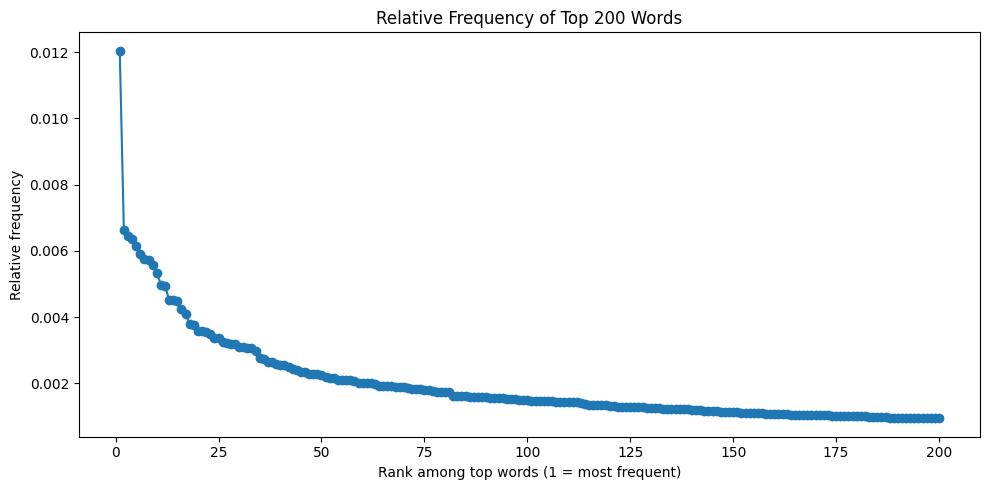

In [ ]:
# Create a graph showing the relative frequency of these 200 words
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(top_df) + 1), top_df["relative_freq"].values, marker="o")
plt.title("Relative Frequency of Top 200 Words")
plt.xlabel("Rank among top words (1 = most frequent)")
plt.ylabel("Relative frequency")
plt.tight_layout()
plt.show()



This graph shows the **relative frequency distribution of the top 200 words** in Jane Austen’s *Emma* after removing stopwords and common names. Each point represents a word ranked by how often it appears in the text, with the most frequent word on the left and less frequent ones toward the right. The steep drop at the beginning shows that a few words occur very often, while most words appear much less frequently. This pattern is typical of natural language and follows **Zipf’s law**, which states that word frequency in a corpus is inversely proportional to its rank. In simpler terms, the most common words dominate the text, but as rank increases, frequency decreases rapidly, forming a long tail. The curve in this plot reflects that behavior, confirming that *Emma*, like most literary works, has a small set of highly frequent content words that shape much of the narrative and a large number of words that occur rarely, adding richness and variety to Austen’s language.


In [41]:
# Zipf's law check: log-log plot frequency vs rank, fit a line and compute slope & R^2
# Build full rank-frequency (not just top 200) to check Zipf

ranked = counts.most_common()
ranks = np.arange(1, len(ranked) + 1, dtype=float)
freqs = np.array([c for _, c in ranked], dtype=float) / total_tokens
 #Guard against zeros (shouldn't happen for counts)
log_ranks = np.log(ranks)
log_freqs = np.log(freqs)

In [42]:
# Linear regression: log_freq = a + b * log_rank
b, a = np.polyfit(log_ranks, log_freqs, 1)
pred = a + b * log_ranks
ss_res = np.sum((log_freqs - pred) ** 2)
ss_tot = np.sum((log_freqs - np.mean(log_freqs)) ** 2)
r2 = 1 - ss_res / ss_tot

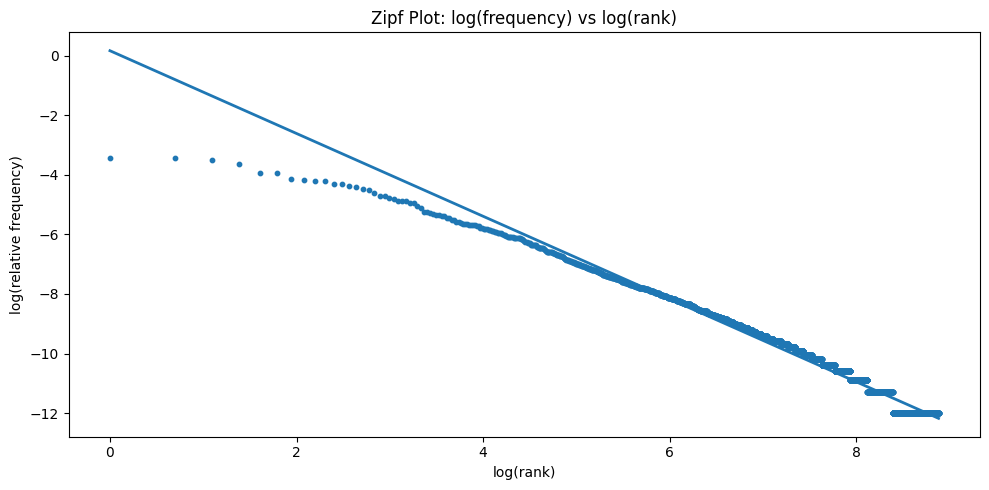

In [43]:
plt.figure(figsize=(10, 5))
plt.scatter(log_ranks, log_freqs, s=10)
plt.plot(log_ranks, pred, linewidth=2)
plt.title("Zipf Plot: log(frequency) vs log(rank)")
plt.xlabel("log(rank)")
plt.ylabel("log(relative frequency)")
plt.tight_layout()
plt.show()

# Save a small text summary of the key stats for the user
summary_lines = [
    f"Corpus tokens: {total_tokens}",
    f"Unique words (definition: case-folded alphabetic tokens with optional apostrophes): {num_unique}",
    f"Unique words needed to cover 50% of tokens: {rank_at_half}",
    f"Zipf fit slope (expected near -1): {b:.3f}",
    f"Zipf fit R^2 (closer to 1.0 indicates better Zipf-like behavior): {r2:.3f}",
]
summary_text = "\n".join(summary_lines)

In [44]:
summary_lines

['Corpus tokens: 160994',
 'Unique words (definition: case-folded alphabetic tokens with optional apostrophes): 7204',
 'Unique words needed to cover 50% of tokens: 56',
 'Zipf fit slope (expected near -1): -1.390',
 'Zipf fit R^2 (closer to 1.0 indicates better Zipf-like behavior): 0.978']


In this graph, we analyzed how words are distributed in *Emma* using Zipf’s Law. The x-axis shows each word’s *rank* (from most frequent to least), while the y-axis shows its *relative frequency*, both on a logarithmic scale. The clear downward-sloping line means that the most common words appear far more often than the rest. This pattern is typical in natural language, where a small group of words like common verbs, articles, and pronouns dominate most of the text. As the rank increases, the frequency drops sharply, forming a straight line on the log-log plot, which confirms that the text follows Zipf’s law.

The summary statistics support this interpretation. The corpus contains around **161,000 tokens** and **7,204 unique words**, which shows that Austen used a rich but structured vocabulary. Interestingly, only **56 unique words** account for half of the entire text, meaning a few words occur repeatedly while many appear rarely. The slope of **-1.39** is very close to the theoretical Zipf’s value of -1, and the **R² value of 0.978** shows an excellent fit, confirming that the word frequencies in *Emma* align strongly with Zipf’s distribution. Overall, this analysis demonstrates that Austen’s writing reflects the universal linguistic pattern where few words are used very often, and most words are rare but contribute to the richness and style of the novel.

